### Importing Relevant Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Loading and Transforming the Data

In [3]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')



### Removing Surplus Data

In [4]:
df_comp['market_value']=df_comp.spx

In [5]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [6]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size= len(df))

In [7]:
df['wn'] = wn

In [8]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1084.910200
std,292.559287,291.947666
min,438.920000,-0.472264
25%,914.620000,887.979359
50%,1144.650000,1086.167585
75%,1316.280729,1275.887123
max,1570.252238,2142.331831


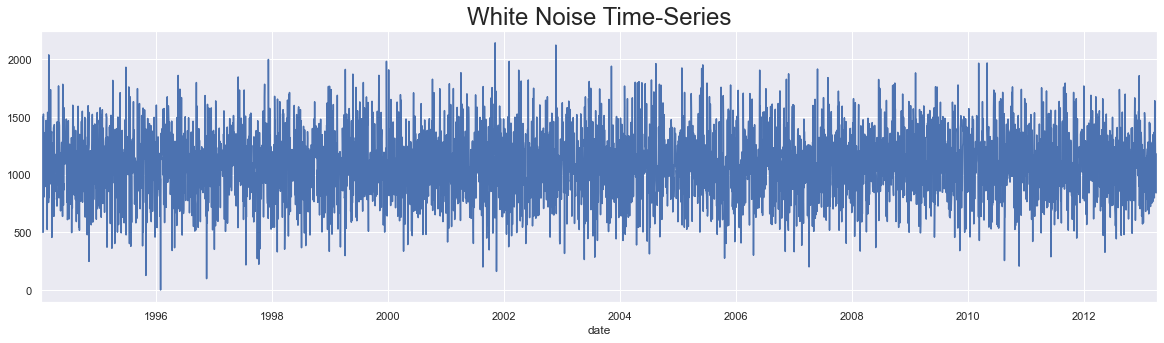

In [9]:
df.wn.plot(figsize= (20, 5))
plt.title('White Noise Time-Series', size = 24)
plt.show()

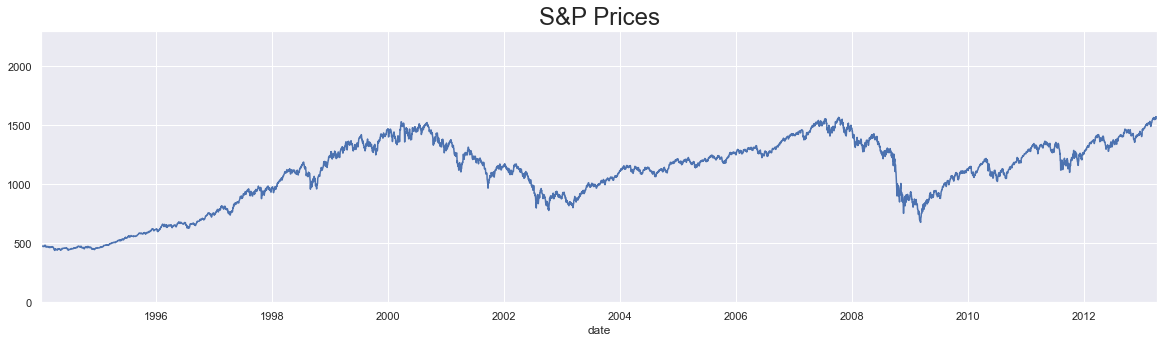

In [10]:
df.market_value.plot(figsize= (20, 5))
plt.title('S&P Prices', size = 24)
# Set ylim to value to control y-value and can compare it
plt.ylim(0, 2300)
plt.show()

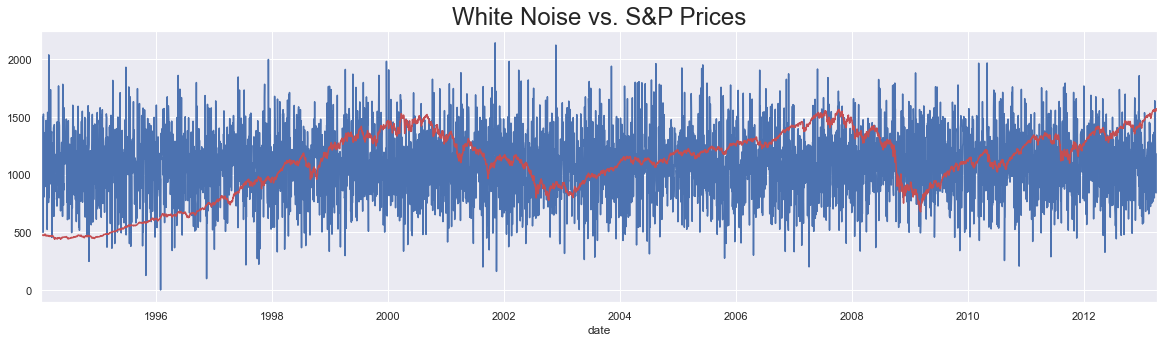

In [11]:
# Combination !
df.wn.plot(figsize= (20, 5))
df.market_value.plot( color='r')
plt.title('White Noise vs. S&P Prices', size = 24)
# plt.ylim(0, 2300) We don't need to set because the plot already set with greatest value ^-^
plt.show()

### Random Walk

In [12]:
rw = pd.read_csv('RandWalk.csv')
rw.date = pd.to_datetime(rw.date, dayfirst= True)
rw.set_index('date', inplace= True)
rw = rw.asfreq('b')

In [13]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [14]:
df['rw'] = rw.price

In [15]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1424.699577,1122.139662
1994-01-10,475.27,1022.819119,1080.347860
1994-01-11,474.13,1500.916191,1082.095245
1994-01-12,474.17,1154.991772,1083.639265
1994-01-13,472.47,743.669450,1067.146255


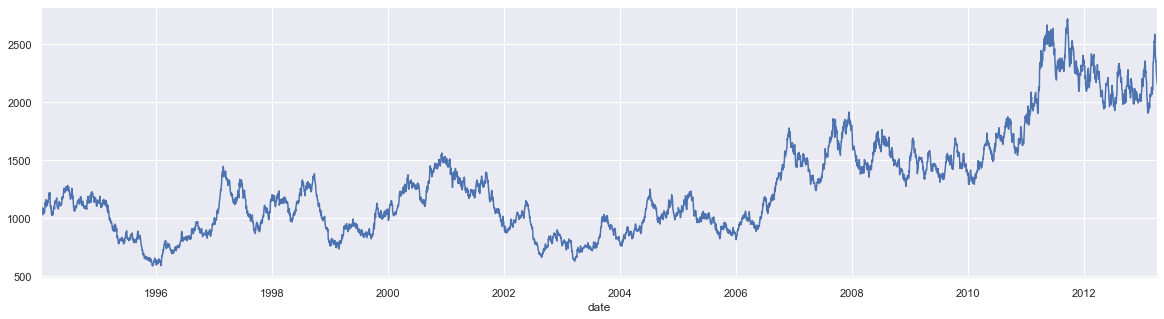

In [16]:
df.rw.plot(figsize= (20, 5))
plt.show()

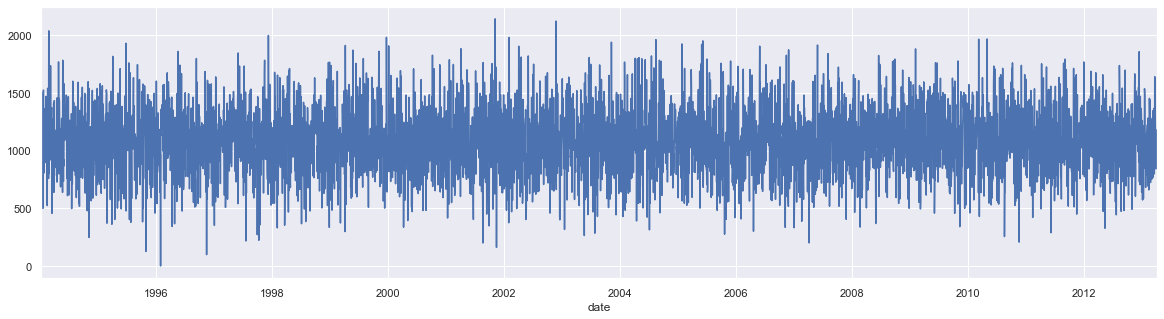

In [17]:
df.wn.plot(figsize= (20, 5))
plt.show()

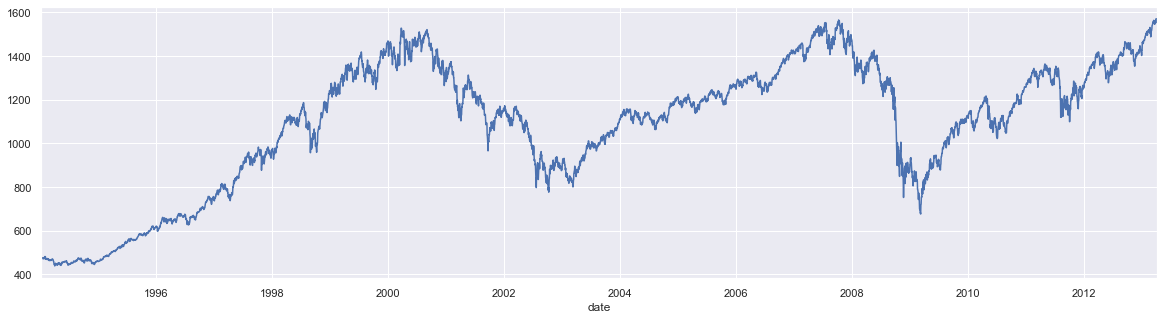

In [18]:
df.market_value.plot(figsize= (20, 5))
plt.show()

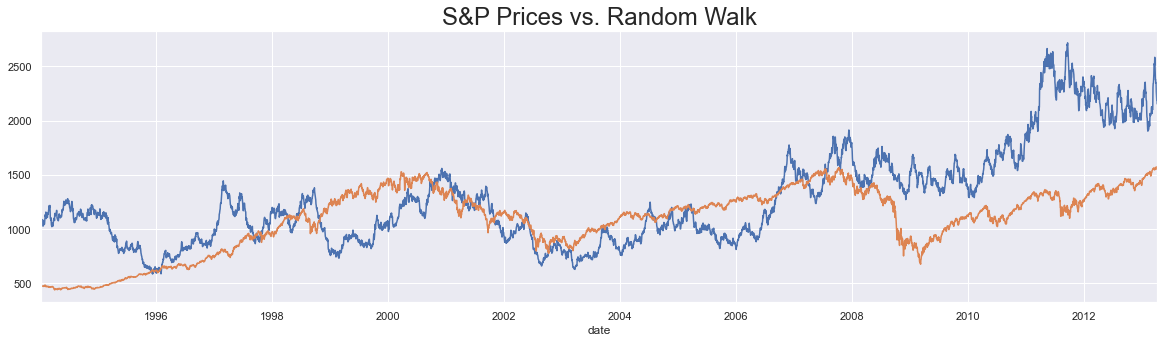

In [19]:
# Combination
df.rw.plot(figsize= (20, 5))
df.market_value.plot()
plt.title('S&P Prices vs. Random Walk', size= 24)
plt.show()

In [20]:
#  Small variations between consecutive time periods
# Cyclical increases and decreases in short periods of time.

### Stationarity

In [21]:
# test statistic < Critical value => Stationarity

In [22]:
sts.adfuller(df.market_value)

(-1.7369847452352458,
 0.41216456967706105,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [23]:
# The test-stats (-1.73 > [1%, 5%, 10%] Critical values)

# second row P-value associated with t-statistics 
# 41% from dataset fail to reject the null hypothesis

#$$ Hence ->> No sufficient evedence of stationarity in dataset

In [24]:
# Run the test in white noise
sts.adfuller(df.wn)

(-70.56718109404626,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70791.94161186587)

In [25]:
# Run the test in Random Walk
sts.adfuller(df.rw)

(-1.3286073927689717,
 0.6159849181617385,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

 ### Seasonality

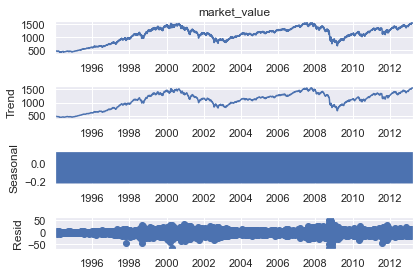

In [26]:
s_dec_additive = seasonal_decompose(df.market_value, model = 'additive')
s_dec_additive.plot()
plt.show()

### additive Decopmosiotion -> No seasonality in the data

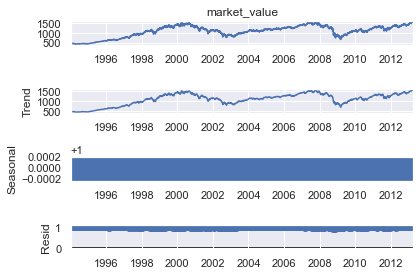

In [27]:
s_dec_multi = seasonal_decompose(df.market_value, model = 'multiplicative')
s_dec_multi.plot()
plt.show()

### Done add & Multi decopmosiotion -> No seasonality among S&P prices

### ACF

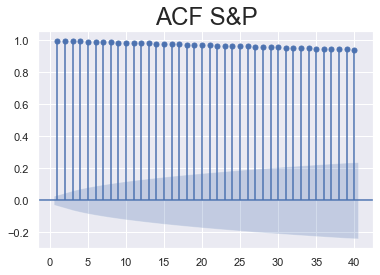

In [33]:
sgt.plot_acf(df.market_value, lags= 40, zero= False)
plt.title('ACF S&P', size= 24)
plt.show()

*Notice* : Suggests the existense of autocorrelation

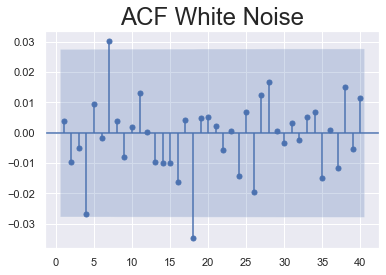

In [34]:
sgt.plot_acf(df.wn, lags= 40, zero= False)
plt.title('ACF White Noise', size= 24)
plt.show()

*Notice* : No autocorrelation for any lags

### Homework 

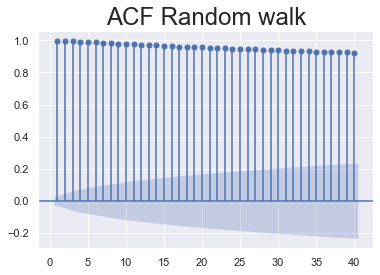

In [36]:
sgt.plot_acf(df.rw, lags= 40, zero= False)
plt.title('ACF Random walk', size= 24)
plt.show()

*Notice* : Random-Walk more likely to be S&P price.

*Hence* the autocorrelation is exist.

### PACF

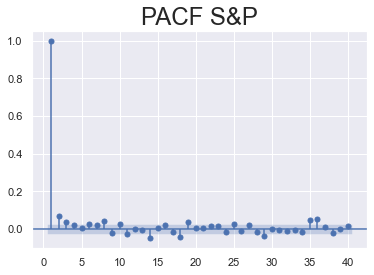

In [39]:
sgt.plot_pacf(df.market_value, lags= 40, zero= False, method = ('ols'))
plt.title('PACF S&P', size= 24)
plt.show()

**PACF** : It cancels out all additional channels a previous period value effects the present one

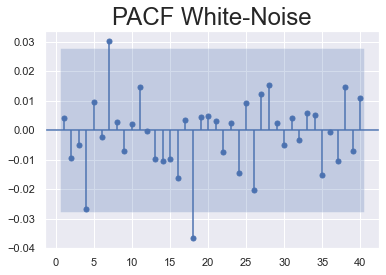

In [40]:
# Check out White-Noise
sgt.plot_pacf(df.wn, lags= 40, zero= False, method = ('ols'))
plt.title('PACF White-Noise', size= 24)
plt.show()

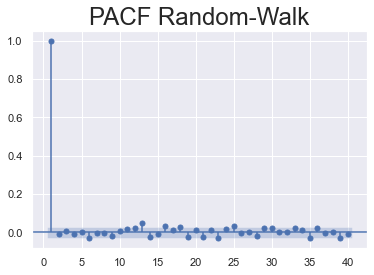

In [41]:
# Check out Random-Walk
sgt.plot_pacf(df.rw, lags= 40, zero= False, method = ('ols'))
plt.title('PACF Random-Walk', size= 24)
plt.show()

*Similarly* Random-wlak more likly to actual data and there is *autocorrelation*